<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/Diabetes_KNN_and_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/pima-indians-diabetes.data.csv')

In [ ]:
df.shape

(767, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df[df.duplicated()]

,6,148,72,35,0,33.6,0.627,50,1


In [ ]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
names=['preg','plas','pres','skin','test','mass','pedi','age','class']


In [ ]:
df=pd.read_csv('/content/pima-indians-diabetes.data.csv',names=names)

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'preg'}>]], dtype=object)

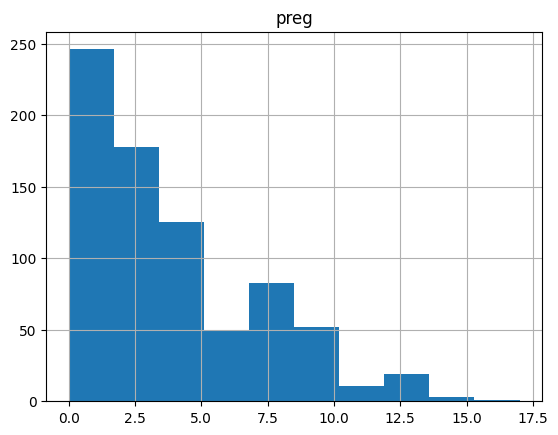

In [ ]:
df.hist('preg')

<Axes: >

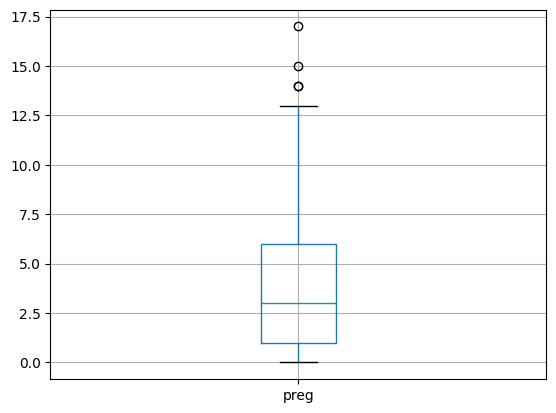

In [ ]:
df.boxplot('preg')

array([[<Axes: title={'center': 'plas'}>]], dtype=object)

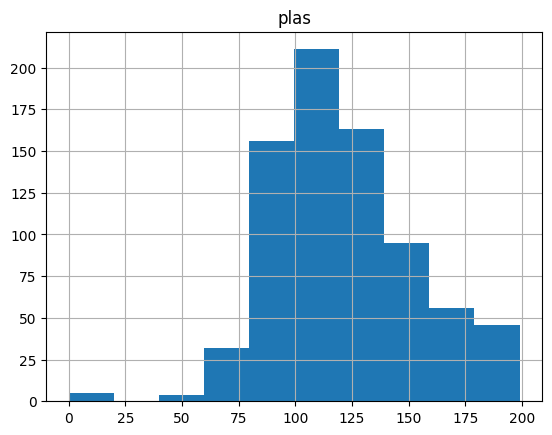

In [ ]:
df.hist('plas')

array([[<Axes: title={'center': 'skin'}>]], dtype=object)

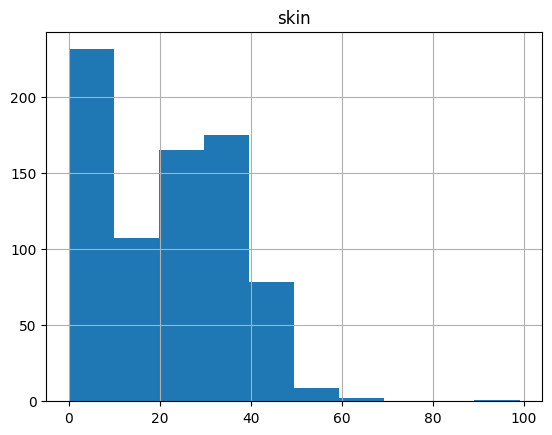

In [ ]:
df.hist('skin')

array([[<Axes: title={'center': 'test'}>]], dtype=object)

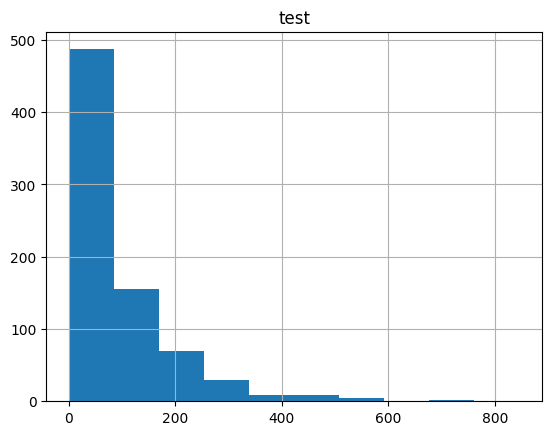

In [ ]:
df.hist('test')

array([[<Axes: title={'center': 'mass'}>]], dtype=object)

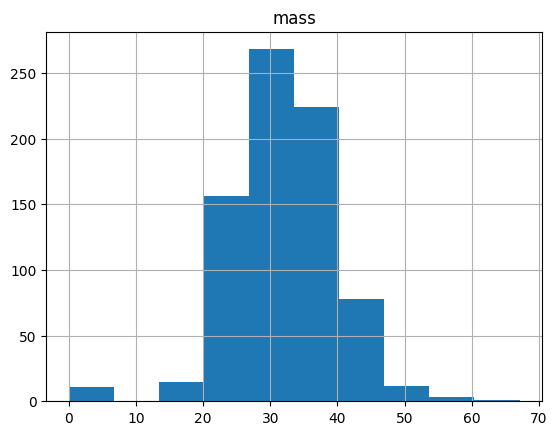

In [ ]:
df.hist('mass')

array([[<Axes: title={'center': 'pedi'}>]], dtype=object)

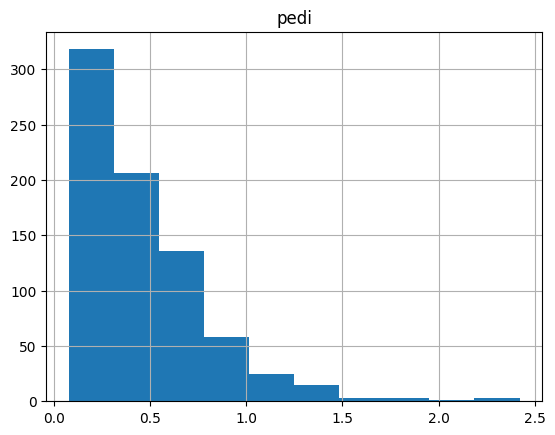

In [ ]:
df.hist('pedi')

array([[<Axes: title={'center': 'age'}>]], dtype=object)

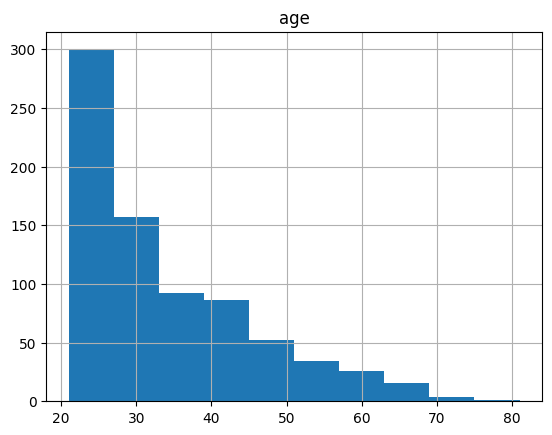

In [ ]:
df.hist('age')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [ ]:
num_folds=10
kfold=KFold(n_splits=10)
model=KNeighborsClassifier(n_neighbors=12)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7525119617224881


In [ ]:
#Grid search for algorithm tuning
#Find the best combination of hyperparameters for machinelearning model

from sklearn.model_selection import GridSearchCV
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [ ]:
model1=KNeighborsClassifier()

grid=GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


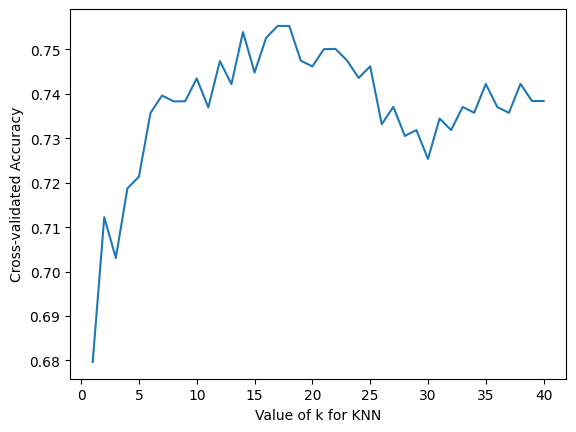

In [ ]:
k_range=range(1,41)
k_scores=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10)
  k_scores.append(scores.mean())

plt.plot(k_range,k_scores)

plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

k=14
knn_classifier=KNeighborsClassifier(n_neighbors=k)

knn_classifier.fit(x_train,y_train)

y_pred=knn_classifier.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7922077922077922

In [ ]:
newdata=pd.DataFrame({'preg':4 ,'plas':135 ,'pres':65	,'skin':20	,'test':80	,'mass':35	,'pedi':0.5	,'age':35	},index=[1])

In [ ]:
knn_classifier.predict(newdata)

array([0])

In [ ]:
num_trees=100
max_features=3
kfold=KFold(n_splits=10,shuffle=True)
model1=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result1=cross_val_score(model1,x,y,cv=kfold)

In [ ]:
print(result1.mean())

0.7704716336295283


In [ ]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7727272727272727


In [ ]:
pd.DataFrame(y_pred,y_test)

,0
1,
1,1
0,0
1,1
1,0
0,0
...,...
0,0
0,0
1,1


In [ ]:
model1.predict(newdata)

ValueError: ignored